Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [15]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 3.00.
Llega vehiculo: Vehiculo-7 a la hora 7.00.
Llega vehiculo: Vehiculo-8 a la hora 9.00.
Removido  {60%} suciedad vehiculo => Vehiculo-1 
Removido  {45%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-1] lavado a las 10.00.
Vehiculo [Vehiculo-3] lavado a las 10.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 10.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 10.00.
Llega vehiculo: Vehiculo-9 a la hora 11.00.
Removido  {52%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-2] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Lle

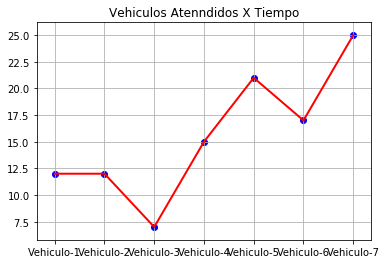

In [16]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
68
Llega vehiculo: Automovil-3 a la hora 7.00.
Removido  {87%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {67%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
49

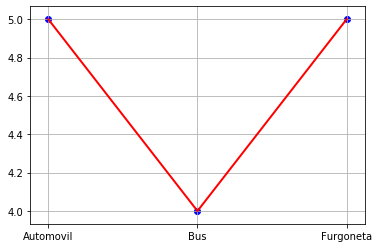

In [40]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Hospital seleccionado: Luis G. Dávila (Carchi)
  - Camas:          54
  - Consultorios:   17
  - Tiempo de espera promedio para cada sala: entre 16.1 y 8.9 minutos según el artículo consultado en (http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1726-46342009000100013) tomando el promedio entre estos dos valores obtendríamos: 12.5 minutos.
  - Tiempo de consulta: entre 10 a 15 minutos según el artículo: (http://www.scielo.org.pe/scielo.php?script=sci_arttext&pid=S1726-46342009000100013) tomando el promedio entre estos dos valores obtendríamos: 12.5 minutos

In [1]:
import simpy
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

tiempo_consulta = 12
tiempo_espera = 12
consultorios = 17
# Un promedio de 100 pacientes por día son atendidos en un hospital para lo
# cual se debe obtener el tiempo de llegada de los pacientes en minutos 13h = 780m
# 780m / 100 = 7.8 minutos por paciente redondeando obtenemos 8
intervalo_llegada = 8
# La duración será el tiempo que un hospital mantiene sus puertas abiertas
# al día (13 horas = 780)
duracion = 780
maximo_pacientes = 50
pacientes = pd.read_csv('Nombres.csv')
pacientes = pacientes.astype(str)
pacientes_hospital = 0
pacientes_consulta = 0
pacientes_atentidos = 0
tiempos_espera = []
promedio_espera = 0
tiempos_atencion = []
promedio_atencion = 0
camas = 54
atencion = pd.DataFrame(columns=('Paciente', 'Hora de llegada', 'Hora de atención', 'Hora de salida', 'Hora de hospitalización'))
datos_dia = pd.DataFrame(columns=('Pacientes', 'Atendidos', 'Diagnosticados',
                                  'Hospitalizados', 'Fallecidos','Promedio espera(mins)', 'Promedio atención(mins)'))
class Hospital(object):
    def __init__(self, environment, consultorios, camas, tiempo_consulta, tiempo_espera):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Recurso consultorios
        self.consultorios = simpy.Resource(environment, consultorios)
        # Recurso camas
        self.camas = simpy.Resource(environment, camas)
        # Tiempo de consulta
        self.tiempo_consulta = tiempo_consulta
        self.tiempo_espera = tiempo_espera
    # Método que dicta el tiempo que el paciente espera en la sala    
    def ubicar_paciente(self, paciente):
        espera = random.randint(tiempo_espera-3, tiempo_espera+3)
        yield self.env.timeout(espera)
        tiempos_espera.append(espera)
    
    # Método que dicta el tiempo de l aduración de la consulta del paciente
    def atender_paciente(self, paciente):
        yield self.env.timeout(random.randint(tiempo_consulta-3, tiempo_consulta+3))
        
def recibir_paciente(env, paciente, hospital):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    atencion.loc[len(atencion),'Paciente'] = paciente
    if len(datos_dia) == 0:
        datos_dia.loc[0, 'Pacientes'] = 1
    else:
        datos_dia.loc[0, 'Pacientes'] += 1
    atencion.loc[atencion['Paciente'] == paciente, ['Hora de llegada']] = (env.now+420)/60
    # Especificamos que vamos a usar un recurso (Resource) que representa un consultorio
    with hospital.consultorios.request() as consultorio:
        yield env.process(hospital.ubicar_paciente(paciente))
        # Ocupamos el consultorio
        yield consultorio
        atencion.loc[atencion['Paciente'] == paciente, ['Hora de atención']] = (env.now+420)/60
        if pd.isnull(datos_dia.loc[0,'Atendidos']):
            datos_dia.loc[0, 'Atendidos'] = 1
        else:
            datos_dia.loc[0, 'Atendidos'] += 1
        # Atendemos al paciente
        yield env.process(hospital.atender_paciente(paciente))
        # Una vez que termina la llamada con 'yield', se indica que se ha atendido al paciente
        atencion.loc[atencion['Paciente'] == paciente, ['Hora de salida']] = (env.now+420)/60
        if pd.isnull(datos_dia.loc[0,'Diagnosticados']):
            datos_dia.loc[0, 'Diagnosticados'] = 1
        else:
            datos_dia.loc[0, 'Diagnosticados'] += 1
    with hospital.camas.request() as cama:
        yield cama
        if pd.isnull(datos_dia.loc[0,'Hospitalizados']):
            datos_dia.loc[0, 'Hospitalizados'] = 1
        else:
            datos_dia.loc[0, 'Hospitalizados'] += 1
        tiempos_atencion.append(env.now+420-(atencion.loc[atencion['Paciente'] == paciente,['Hora de llegada']].iloc[0,0])*60)
        atencion.loc[atencion['Paciente'] == paciente, ['Hora de hospitalización']] = (env.now+420)/60
        yield env.timeout(1000)
    
def ejecutar_simulacion(env, consultorios, camas, tiempo_consulta, tiempo_espera, intervalo):
    hospital = Hospital(env, consultorios, camas, tiempo_consulta, tiempo_espera)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(17):
        env.process(recibir_paciente(env, '%s'%(pacientes.iloc[i,0]), hospital))
    # Ejecutamos la simulacion
    while i < maximo_pacientes:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(recibir_paciente(env,'%s'%(pacientes.iloc[i,0]),hospital))
        
def formatear_hora(hora_double):
    decimal, entero = math.modf(round(hora_double,2))
    decimal = decimal * 60 /100
    hora_double = round(entero + decimal,2)
    return round(hora_double,2)
        
env=simpy.Environment()
env.process(ejecutar_simulacion(env, consultorios, camas, tiempo_consulta, tiempo_espera, intervalo_llegada))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = duracion)

datos_dia.loc[0, 'Fallecidos'] = datos_dia.loc[0, 'Pacientes']-datos_dia.loc[0, 'Hospitalizados']

for i in tiempos_espera:
    promedio_espera += i
promedio_espera /= len(tiempos_espera)
promedio_espera = round(promedio_espera,2)
datos_dia.loc[0,'Promedio espera(mins)'] = promedio_espera

for i in tiempos_atencion:
    promedio_atencion += i
promedio_atencion /= len(tiempos_atencion)
promedio_atencion = round(promedio_atencion,2)
datos_dia.loc[0,'Promedio atención(mins)'] = promedio_atencion

<Figure size 432x288 with 0 Axes>

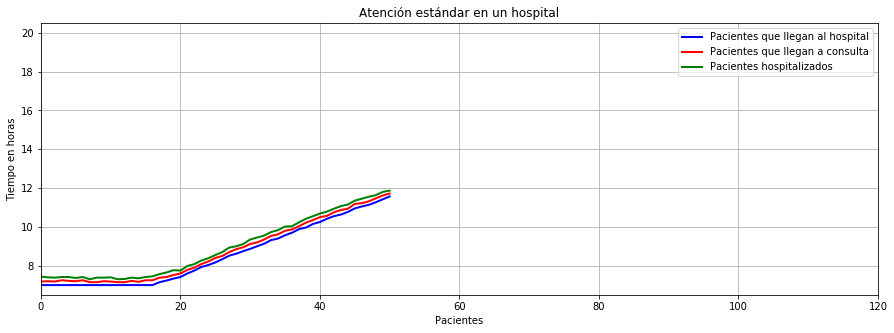

In [9]:
def graficar(x1,x2,y1,y2, titulo):
    fig = plt.figure(facecolor='w')
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(np.arange(0,len(atencion)), atencion.loc[:,'Hora de llegada']
             ,'b', alpha=1, lw = 2, label = 'Pacientes que llegan al hospital')
    ax.plot(np.arange(0,len(atencion)), atencion.loc[:,'Hora de atención']
             ,'r', alpha=1, lw = 2, label = 'Pacientes que llegan a consulta')
    ax.plot(np.arange(0,len(atencion)), atencion.loc[:,'Hora de hospitalización']
             ,'g', alpha=1, lw = 2, label = 'Pacientes hospitalizados')
    ax.set_xlabel('Pacientes')
    ax.set_ylabel('Tiempo en horas')
    ax.set_title(titulo)
    ax.set_xlim(x1,x2)
    ax.set_ylim(y1,y2)
    ax.legend()
    ax.grid()
graficar(0,120,6.5,20.5, "Atención estándar en un hospital")

<Figure size 432x288 with 0 Axes>

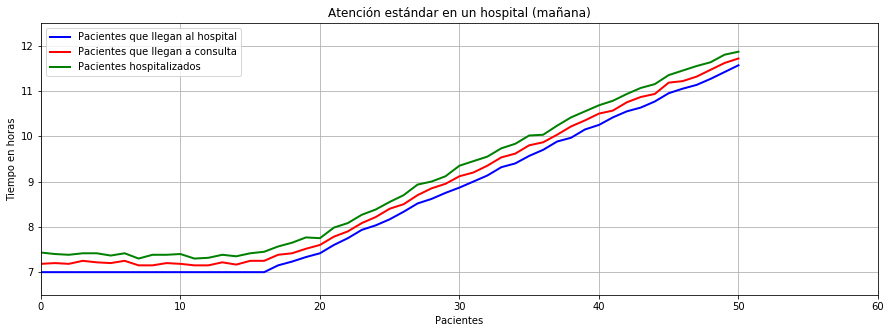

In [10]:
graficar(0,60,6.5,12.5,"Atención estándar en un hospital (mañana)")

<Figure size 432x288 with 0 Axes>

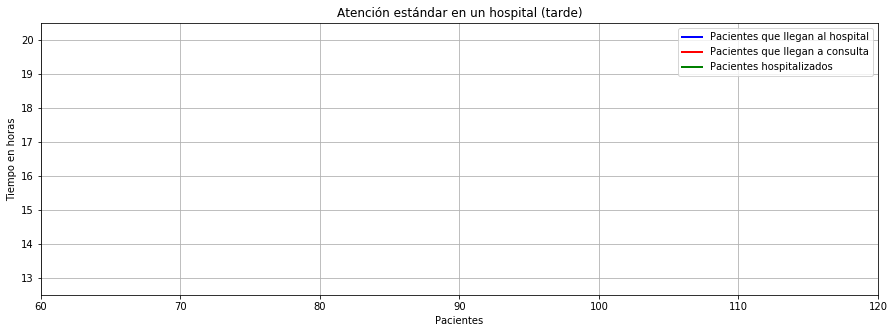

In [11]:
graficar(60,120,12.5,20.5, "Atención estándar en un hospital (tarde)")

In [14]:
datos_dia

Pacientes Atendidos Diagnosticados Hospitalizados Fallecidos  \
0        51        51             51             51          0   

  Promedio espera(mins) Promedio atención(mins)  
0                 12.04                   23.84

In [15]:
# 'Hora de llegada', 'Hora de atención', 'Hora de salida', 'Hora de hospitalización'))
atencion['Hora de llegada'] = atencion['Hora de llegada'].map(lambda x : str(formatear_hora(x)).replace(".",":"))
atencion['Hora de atención'] = atencion['Hora de atención'].map(lambda x : str(formatear_hora(x)).replace(".",":"))
atencion['Hora de salida'] = atencion['Hora de salida'].map(lambda x : str(formatear_hora(x)).replace(".",":"))
atencion['Hora de hospitalización'] = atencion['Hora de hospitalización'].map(lambda x : str(formatear_hora(x)).replace(".",":"))
atencion

Paciente Hora de llegada Hora de atención Hora de salida  \
0         Elva             7:0             7:14           7:23   
1       Henrik             7:0              7:1            7:2   
2       Myrvyn             7:0             7:14           7:25   
3      Bobette             7:0             7:11           7:25   
4       Dionis             7:0             7:12           7:22   
5       Erinna             7:0             7:12           7:24   
6        Sophi             7:0             7:09           7:18   
7      Zitella             7:0             7:11           7:24   
8       Thekla             7:0             7:09           7:19   
9         Lora             7:0             7:12           7:23   
10       Clyve             7:0             7:15           7:25   
11        Ibby             7:0             7:12           7:23   
12      Rosene             7:0             7:15           7:24   
13      Rooney             7:0             7:11           7:21   
14      Allina             7:0             7:15           7:29   
15      Ilario             7:0             7:09           7:24   
16     Aurilia             7:0             7:09           7:23   
17      Vinson            7:08             7:22           7:31   
18       Urban            7:15             7:24           7:37   
19      Anselm            7:21              7:3           7:45   
20       Erich            7:29              7:4            7:5   
21     Homerus             7:4             7:55            8:1   
22      Lezlie            7:47             7:56           8:08   
23    Cristine            7:58             8:11           8:22   
24       Lanny            8:08             8:21           8:32   
25         Rog            8:18             8:31           8:41   
26        Gael            8:25             8:35           8:46   
27     Aloysia            8:32             8:46           8:59   
28      Sharia            8:39             8:53           9:06   
29        Arne            8:47             9:02           9:17   
30    Thurstan            8:57             9:07           9:19   
31         Gar            9:07             9:16           9:27   
32        Wynn            9:13             9:26           9:41   
33      Laurie            9:23             9:34           9:46   
34        Earl            9:32             9:41           9:53   
35  Georgeanna            9:37             9:48           9:57   
36      Flossy            9:45             10:0          10:11   
37     Tirrell            9:54            10:04          10:14   
38    Nickolai           10:04            10:16          10:31   
39      Dugald           10:12            10:27          10:36   
40       Moise           10:21            10:36          10:47   
41       Lissa           10:27            10:39          10:49   
42     Garrott           10:37            10:48           11:0   
43       Kelsy           10:47            10:59          11:08   
44      Faydra           10:54            11:09          11:22   
45        Sile            11:0             11:1          11:22   
46     Jacklin            11:1            11:25           11:4   
47       Jorey           11:15            11:29          11:43   
48     Lilllie           11:26            11:39          11:52   
49         Pet           11:33            11:45          11:58   
50  Ermentrude           11:44            11:55          12:09   

   Hora de hospitalización  
0                     7:23  
1                      7:2  
2                     7:25  
3                     7:25  
4                     7:22  
5                     7:24  
6                     7:18  
7                     7:24  
8                     7:19  
9                     7:23  
10                    7:25  
11                    7:23  
12                    7:24  
13                    7:21  
14                    7:29  
15                    7:24  
16                    7:23  
17                    7:31  
18                    


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 